In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
data=pd.read_csv("/content/clean_data (1).csv")

In [6]:
data

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,1,0,group C,some college,standard,1,69,90,88,247
2,2,0,group B,master's degree,standard,0,90,95,93,278
3,3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,4,1,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...,...
995,995,0,group E,master's degree,standard,1,88,99,95,282
996,996,1,group C,high school,free/reduced,0,62,55,55,172
997,997,0,group C,high school,free/reduced,1,59,71,65,195
998,998,0,group D,some college,standard,1,68,78,77,223


([<matplotlib.axis.XTick at 0x7fb0d1ba5630>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

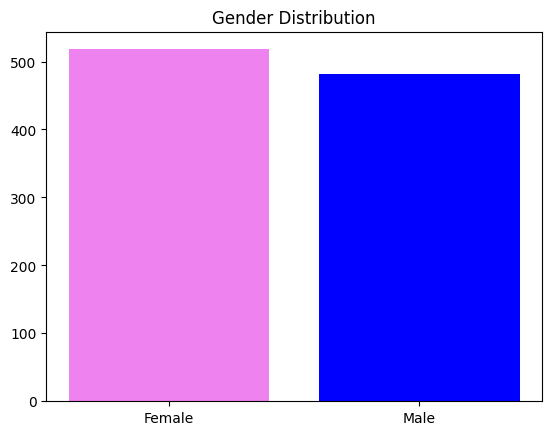

In [7]:
# Examine the gender distribution in the data we gathered.

plt.bar(data['gender'].value_counts().index,
       data['gender'].value_counts().values,
       color = ['violet', 'blue'])
plt.title('Gender Distribution')
plt.xticks(data['gender'].value_counts().index,['Female','Male'])

Text(0.5, 0.98, 'Scores distribution by gender')

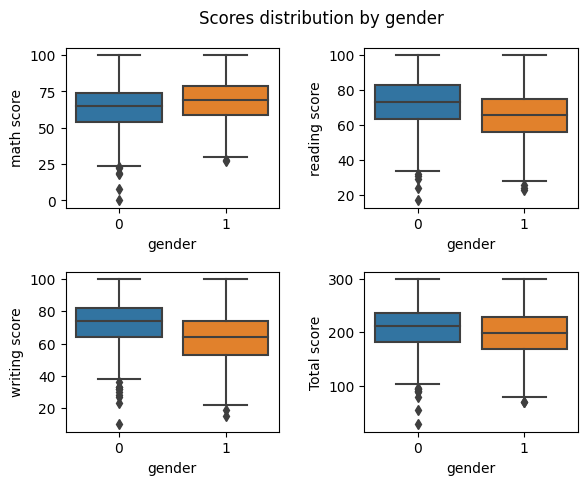

In [8]:
#Visualisation 2

# different scores distribution based on gender
figure, axis = plt.subplots(2, 2)


sns.boxplot(x=data['gender'],y=data['math score'],ax=axis[0,0])
sns.boxplot(x=data['gender'],y=data['reading score'],ax=axis[0,1])
sns.boxplot(x=data['gender'],y=data['writing score'],ax=axis[1,0])
sns.boxplot(x=data['gender'],y=data['Total score'],ax=axis[1,1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.suptitle('Scores distribution by gender')

Text(0.5, 0.98, 'Frequency distribution of scores')

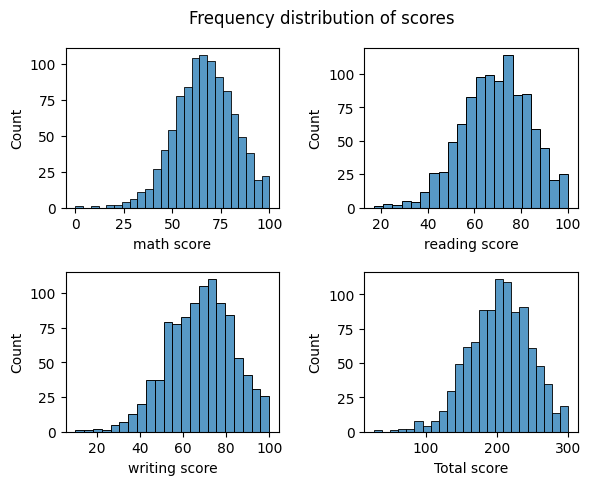

In [9]:
#visualisation 3

figure, axis = plt.subplots(2,2)

sns.histplot(data['math score'],ax=axis[0,0],label='math score')
sns.histplot(data['reading score'],ax=axis[0,1],label='reading score')
sns.histplot(data['writing score'],ax=axis[1,0],label='writing score')
sns.histplot(data['Total score'],ax=axis[1,1],label='Total score')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.suptitle('Frequency distribution of scores')

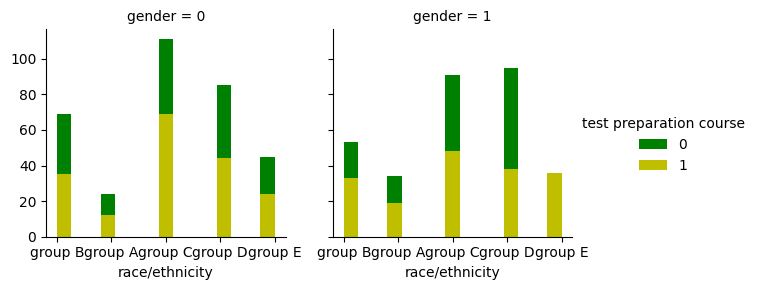

In [10]:
#Visualisation4

graph = sns.FacetGrid(data, col ='gender',hue_kws={'color': ['g', 'y']}, hue ='test preparation course')
# map the above form facetgrid with some attributes
graph.map(plt.hist, 'race/ethnicity', bins = 15, color ='orange').add_legend()
# show the object

In [11]:
gender_mapping = {'female': 0, 'male': 1}
test_prep_mapping = {'none': 0, 'completed': 1}

# Applying the mapping to the respective columns
data_clean['gender'] = data_clean['gender'].map(gender_mapping)
data_clean['test preparation course'] = data_clean['test preparation course'].map(test_prep_mapping)

# Creating the 'Total score' column
data_clean['Total score'] = data_clean['math score'] + data_clean['writing score'] + data_clean['reading score']
plt.show()

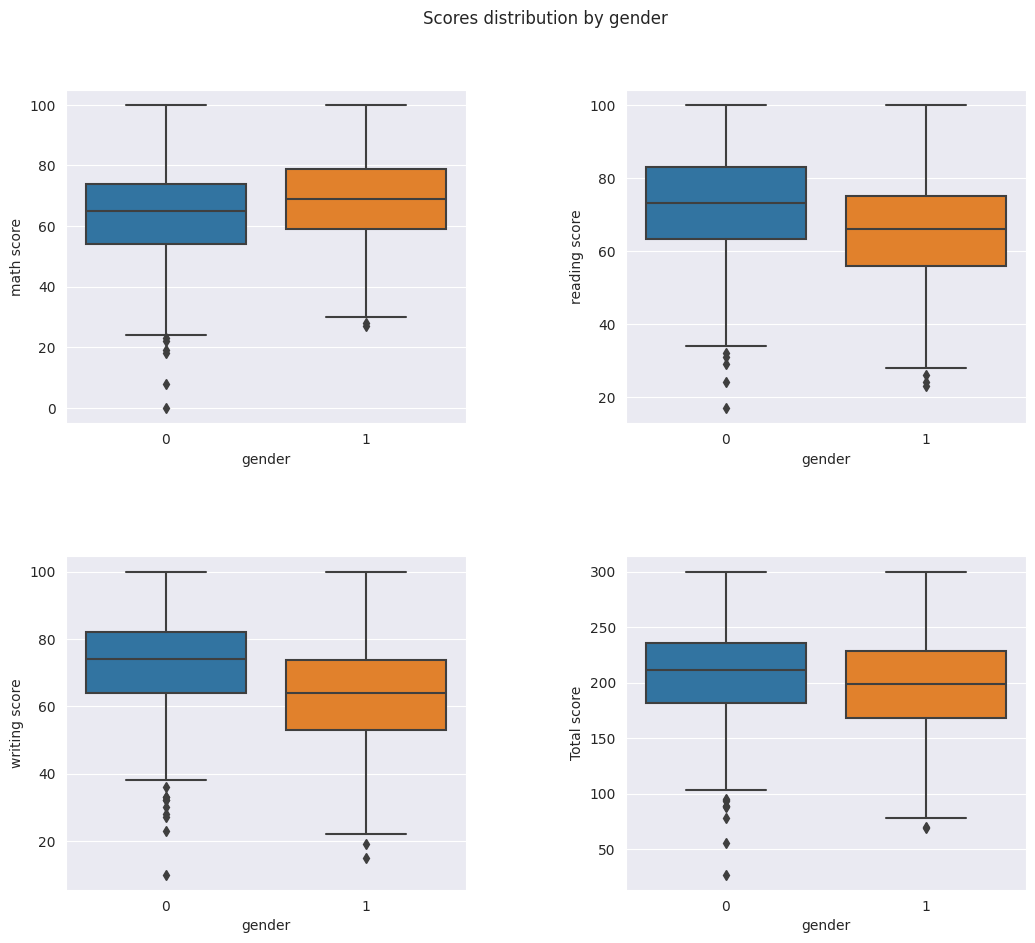

In [12]:
sns.set_style('darkgrid')

figure, axis = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=data['gender'], y=data['math score'], ax=axis[0,0])
sns.boxplot(x=data['gender'], y=data['reading score'], ax=axis[0,1])
sns.boxplot(x=data['gender'], y=data['writing score'], ax=axis[1,0])
sns.boxplot(x=data['gender'], y=data['Total score'], ax=axis[1,1])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.suptitle('Scores distribution by gender')

plt.show()#ch sets the style to 'darkgrid'. You can choose from various styles including 'whitegrid', 'dark', 'white', and more. Feel free to experiment with different styles to find the one that suits your visualization preferences.







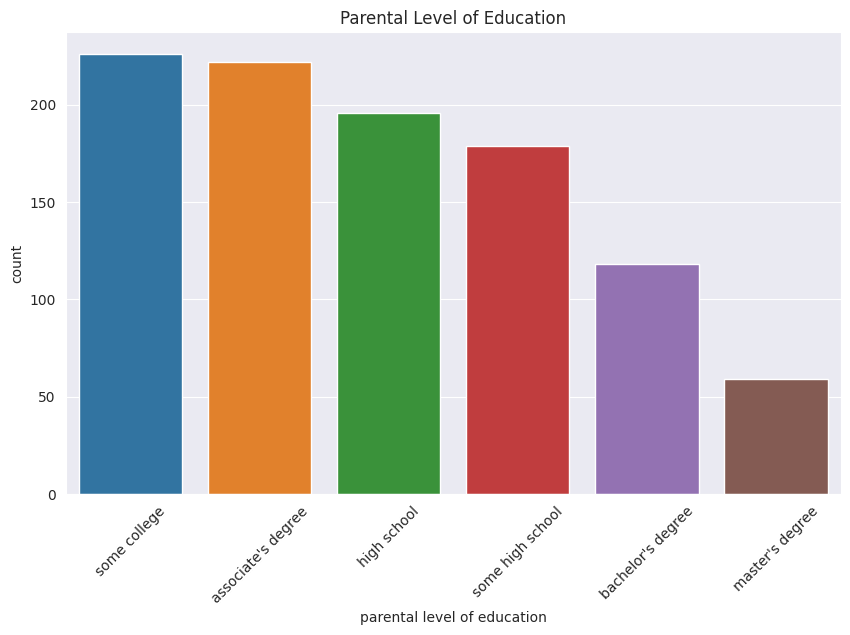

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', data=data, order=data['parental level of education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Parental Level of Education')
plt.show()


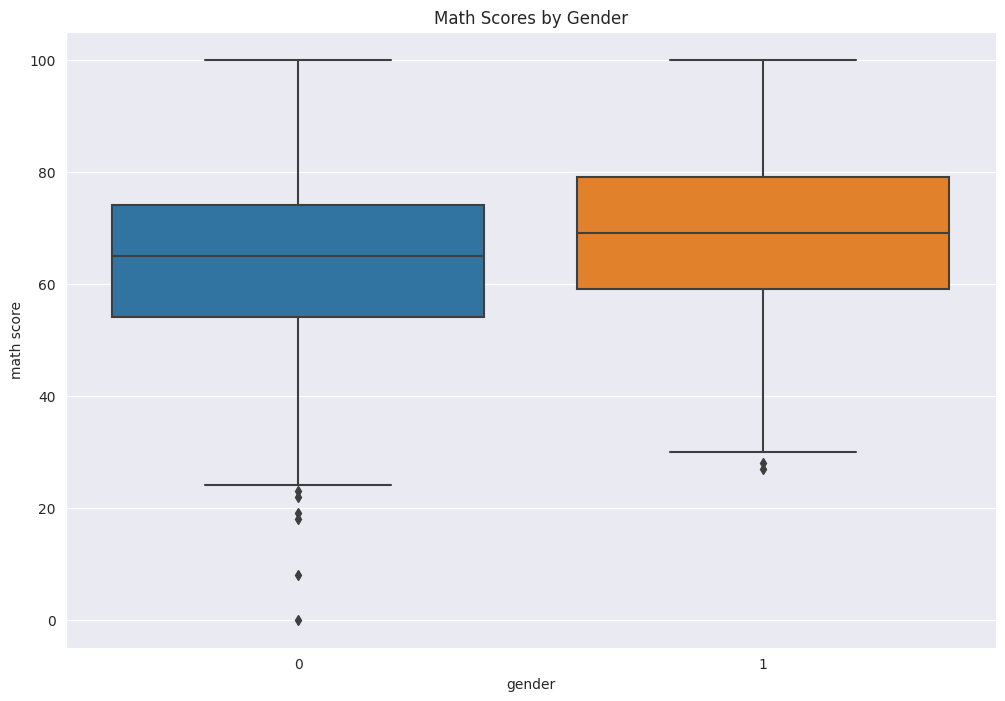

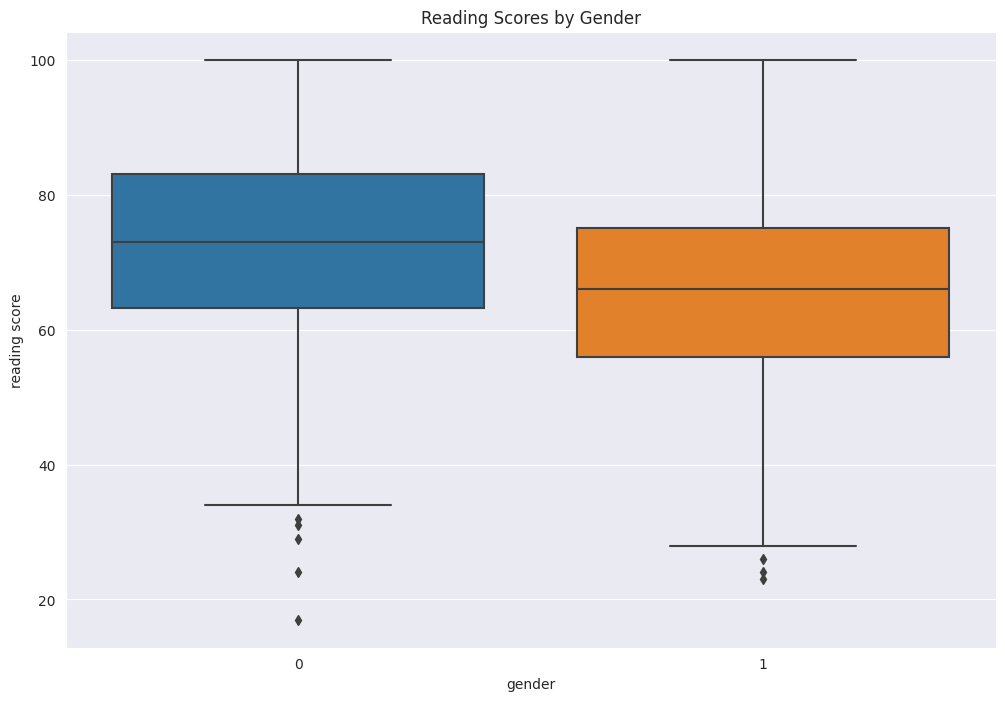

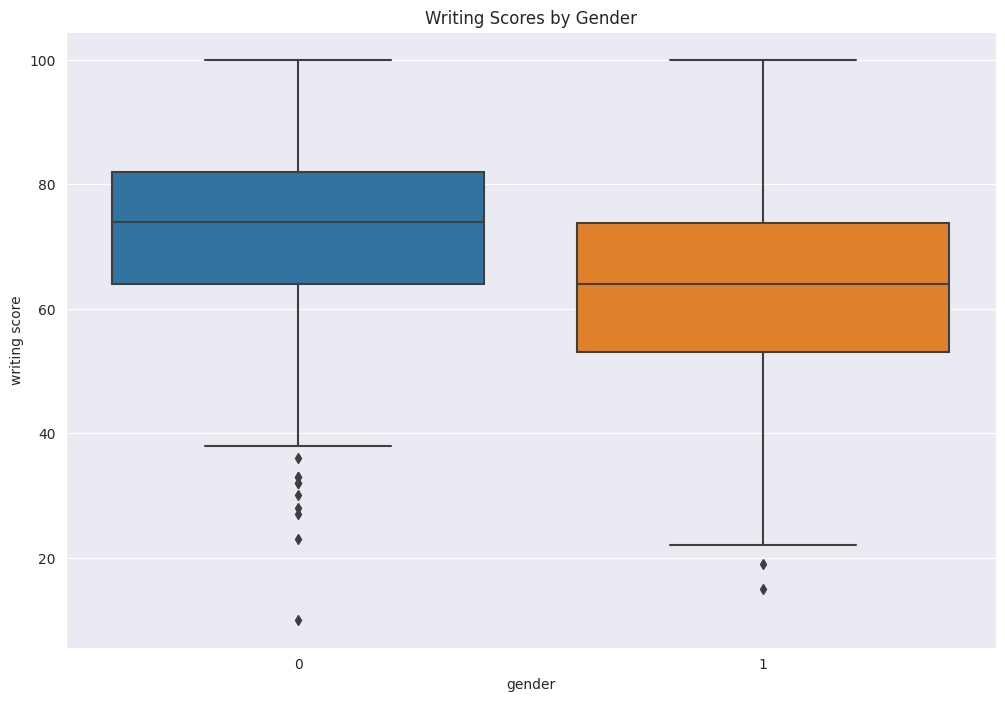

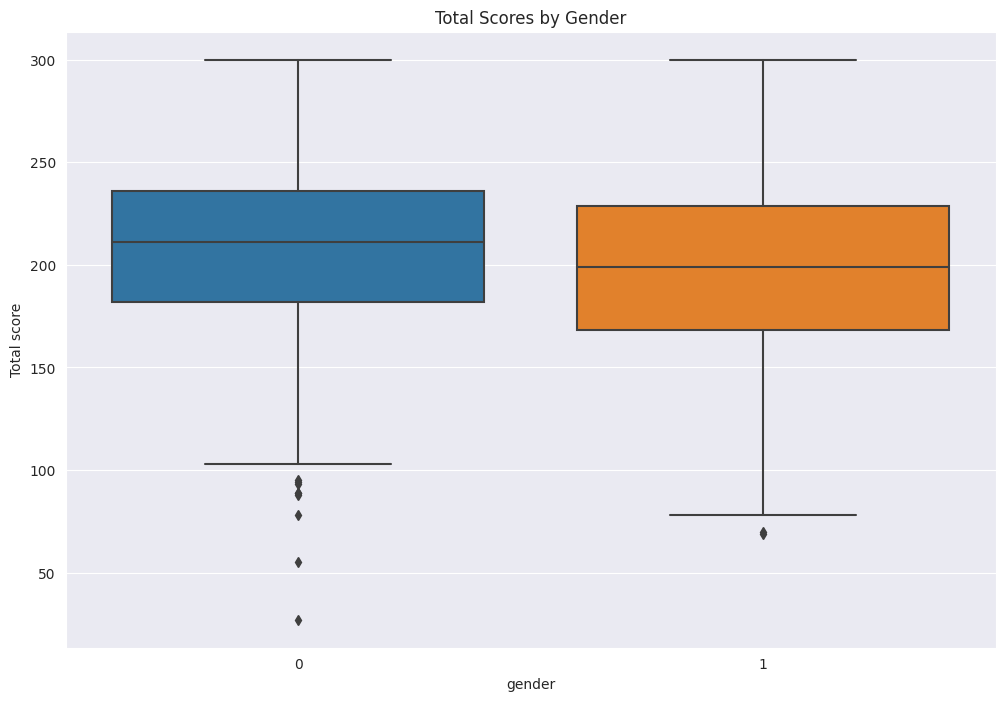

In [14]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender', y='math score', data=data)
plt.title('Math Scores by Gender')

plt.figure(figsize=(12, 8))
sns.boxplot(x='gender', y='reading score', data=data)
plt.title('Reading Scores by Gender')

plt.figure(figsize=(12, 8))
sns.boxplot(x='gender', y='writing score', data=data)
plt.title('Writing Scores by Gender')

plt.figure(figsize=(12, 8))
sns.boxplot(x='gender', y='Total score', data=data)
plt.title('Total Scores by Gender')

plt.show()


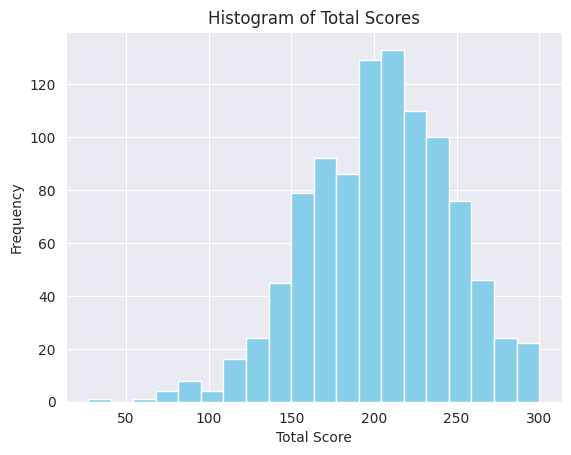

In [15]:
plt.hist(data['Total score'], bins=20, color='skyblue')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Histogram of Total Scores')
plt.show()


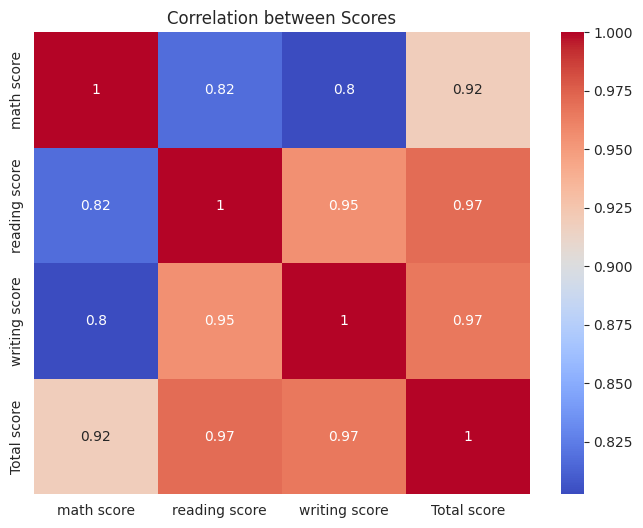

In [16]:
plt.figure(figsize=(8, 6))
correlation = data[['math score', 'reading score', 'writing score', 'Total score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Scores')
plt.show()


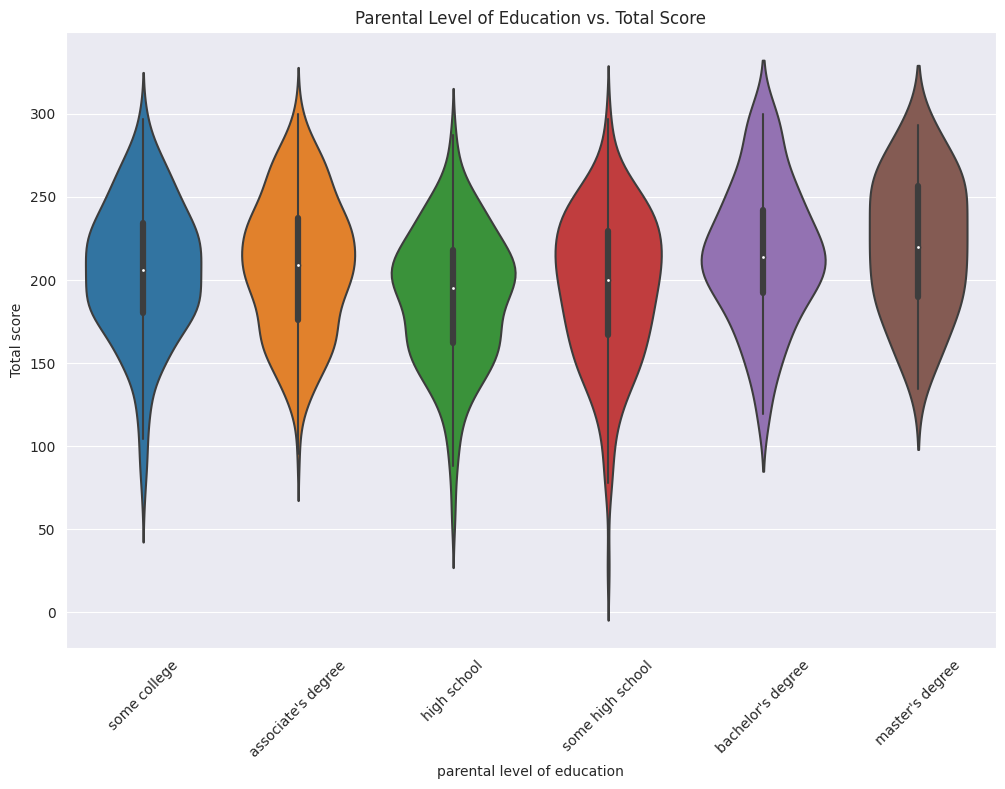

In [17]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='parental level of education', y='Total score', data=data, order=data['parental level of education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Parental Level of Education vs. Total Score')
plt.show()


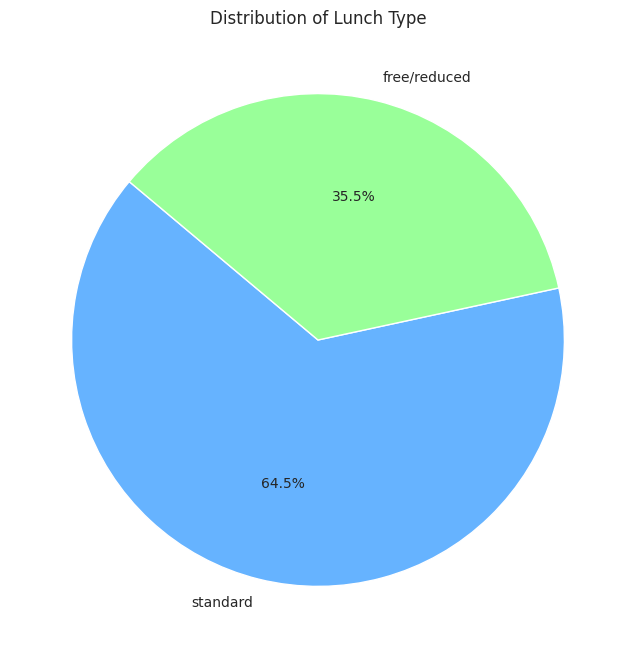

In [18]:
plt.figure(figsize=(8, 8))
labels = data['lunch'].value_counts().index
sizes = data['lunch'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Lunch Type')
plt.show()


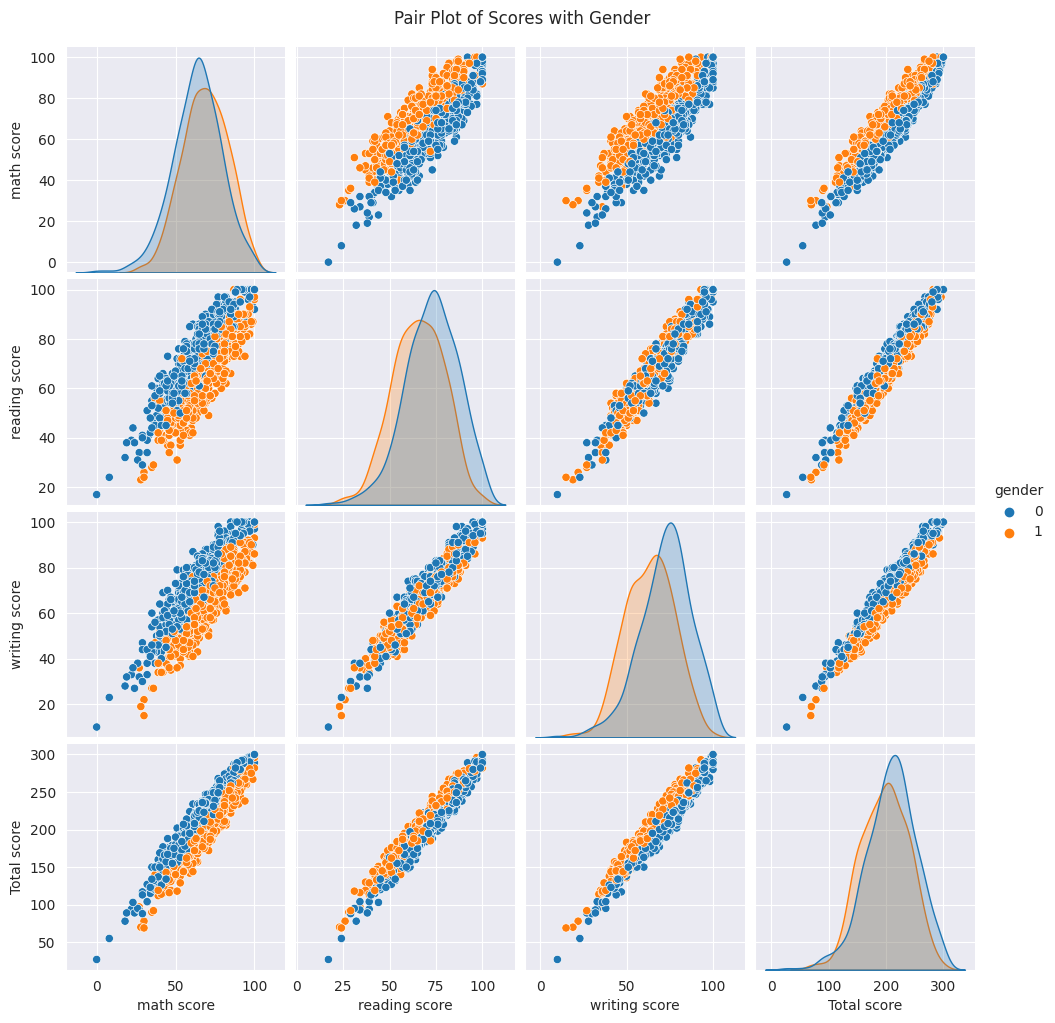

In [19]:
sns.pairplot(data[['math score', 'reading score', 'writing score', 'Total score', 'gender']], hue='gender')
plt.suptitle('Pair Plot of Scores with Gender', y=1.02)
plt.show()
